# 종가 분석

In [114]:
# 모듈 임포트!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [115]:
raw_data = pd.read_csv('/content/datasets/Samsung.csv')
print(raw_data.head())

         Date    Open    High     Low   Close    Adj Close      Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4740.119629  74195000.0
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4328.947754  74680000.0
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4359.979492  54390000.0
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4297.916992  40305000.0
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4476.349121  46880000.0


In [116]:
print(raw_data.tail())

            Date     Open     High      Low    Close  Adj Close      Volume
5385  2021-06-07  82700.0  82800.0  81600.0  81900.0    81900.0  16496197.0
5386  2021-06-08  82300.0  82600.0  81800.0  81900.0    81900.0  12781226.0
5387  2021-06-09  81500.0  82000.0  81100.0  81100.0    81100.0  14908823.0
5388  2021-06-10  81300.0  81400.0  80900.0  81000.0    81000.0  17586995.0
5389  2021-06-11  81200.0  81700.0  80700.0  81000.0    81000.0  14087962.0


In [117]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5390 non-null   object 
 1   Open       5384 non-null   float64
 2   High       5384 non-null   float64
 3   Low        5384 non-null   float64
 4   Close      5384 non-null   float64
 5   Adj Close  5384 non-null   float64
 6   Volume     5384 non-null   float64
dtypes: float64(6), object(1)
memory usage: 294.9+ KB
None


In [118]:
# 종가 데이터 추출
data_close = raw_data[['Close']]
print(data_close.head())

    Close
0  6110.0
1  5580.0
2  5620.0
3  5540.0
4  5770.0


In [119]:
data_close = data_close.sort_values('Close')
print(data_close.head())
print(data_close.tail(20))

      Close
206  2730.0
205  2740.0
214  2750.0
452  2810.0
453  2810.0
        Close
5297  85600.0
5343  86000.0
5296  86700.0
5294  86800.0
5291  87000.0
5292  87200.0
5289  88000.0
5293  88100.0
5284  88800.0
5295  89400.0
5288  89700.0
5287  89700.0
5286  90600.0
5285  91000.0
1304      NaN
4513      NaN
4518      NaN
4542      NaN
4755      NaN
5000      NaN


In [120]:
# 자료를 순서대로 주기 위해 date 컬럼을 날짜 데이터로 변환
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)
print(raw_data.head())

              Open    High     Low   Close    Adj Close      Volume
Date                                                               
2000-01-04  6000.0  6110.0  5660.0  6110.0  4740.119629  74195000.0
2000-01-05  5800.0  6060.0  5520.0  5580.0  4328.947754  74680000.0
2000-01-06  5750.0  5780.0  5580.0  5620.0  4359.979492  54390000.0
2000-01-07  5560.0  5670.0  5360.0  5540.0  4297.916992  40305000.0
2000-01-10  5600.0  5770.0  5580.0  5770.0  4476.349121  46880000.0


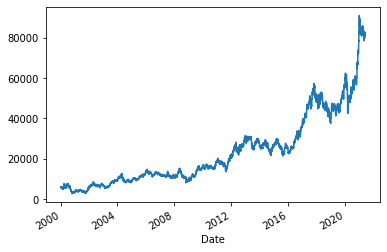

In [121]:
# 종가 기준으로 plot화
raw_data['Close'].plot()
plt.show()

In [122]:
# 데이터 타입을 날짜로 변환했기 때문에 날짜로 인덱싱 가능
data = raw_data['2019-06-15' : '2020-06-14'][['Close']]
print(data.head())
print(data.tail())
print(data.info())

              Close
Date               
2019-06-17  43900.0
2019-06-18  44350.0
2019-06-19  45350.0
2019-06-20  45500.0
2019-06-21  45700.0
              Close
Date               
2020-06-08  54900.0
2020-06-09  55500.0
2020-06-10  55400.0
2020-06-11  54300.0
2020-06-12  52300.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2019-06-17 to 2020-06-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   245 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None


In [123]:
# nan값 제거
data.dropna(inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2019-06-17 to 2020-06-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   245 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None


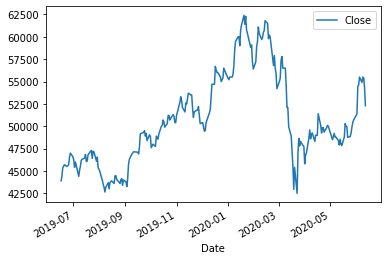

In [124]:
data.plot()
plt.show()

In [125]:
# 최저값이 0 최대값이 1이 되도록 비례적으로 스케일링하기
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

scaled_data = minmaxscaler.fit_transform(data) # 스케일링 후엔 데이터프레임이 깨지고 nparray화 됨
print(scaled_data[:6])
print(scaled_data.shape)

[[0.07035176]
 [0.09296482]
 [0.14321608]
 [0.15075377]
 [0.16080402]
 [0.15075377]]
(245, 1)


# RNN 모델
https://dreamgonfly.github.io/blog/understanding-rnn/

입출력 단위를 시퀀스 단위로 처리하는 모델    
입력 레이어는 1개이지만 들어갈 데이터는 DENSE 레이어와 다르게 한 세트가 들어간다.  
그 세트는 지정된 갯수만큼이고 순서대로 들어간다.

- 우리는 28개의 데이터를 1세트로 묶음  

# LSTM 모델
RNN 모델 성능을 업그레이드 시킨 모델  
https://simpling.tistory.com/19  
https://hororolol.tistory.com/166

In [126]:
# 각 길이가 28인 시퀀스로 만듦

# 모델에 입력될 데이터
sequence_X = []

# 모델이 예측할 데이터
sequence_Y = []

# 28개씩 시퀀스 데이터화하기
for i in range(len(scaled_data) - 28):
    _x = scaled_data[i: i+28]
    _y = scaled_data[i + 28]
    if i is 0:
        print(_x, '->', _y)
    sequence_X.append(_x)
    sequence_Y.append(_y)

[[0.07035176]
 [0.09296482]
 [0.14321608]
 [0.15075377]
 [0.16080402]
 [0.15075377]
 [0.15577889]
 [0.16080402]
 [0.20100503]
 [0.22613065]
 [0.20603015]
 [0.18844221]
 [0.14572864]
 [0.1758794 ]
 [0.15829146]
 [0.09547739]
 [0.13065327]
 [0.15326633]
 [0.18592965]
 [0.19095477]
 [0.19849246]
 [0.21859296]
 [0.17839196]
 [0.18090452]
 [0.2160804 ]
 [0.2361809 ]
 [0.24120603]
 [0.1959799 ]] -> [0.2361809]


In [127]:
# np.array화
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)

print(sequence_X[1])
print(sequence_Y[1])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.09296482]
 [0.14321608]
 [0.15075377]
 [0.16080402]
 [0.15075377]
 [0.15577889]
 [0.16080402]
 [0.20100503]
 [0.22613065]
 [0.20603015]
 [0.18844221]
 [0.14572864]
 [0.1758794 ]
 [0.15829146]
 [0.09547739]
 [0.13065327]
 [0.15326633]
 [0.18592965]
 [0.19095477]
 [0.19849246]
 [0.21859296]
 [0.17839196]
 [0.18090452]
 [0.2160804 ]
 [0.2361809 ]
 [0.24120603]
 [0.1959799 ]
 [0.2361809 ]]
[0.23366834]
(217, 28, 1)
(217, 1)


In [128]:
# 훈련 set, 검증 set로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sequence_X, sequence_Y, test_size = 0.2)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(173, 28, 1)
(173, 1)
(44, 28, 1)
(44, 1)


In [129]:
X_train.shape
# 데이터 모양을 확인하면 28이 인덱스 1인 것을 확인 할 수 있음

(173, 28, 1)

In [130]:
model = Sequential()
# RNN모델보다 발전한 LSTM모델 사용

# 위에서 확인한 인덱스는 모델이 변경될 때마다 일일히 수정해주어야함
model.add(LSTM(50, 
               input_shape=(X_train.shape[1], X_train.shape[2]), # 좀 더 간편하게 아예 인덱스 번호를 지정
                            activation='tanh'))
# 인덱스 번호 미지정시 코드
# model.add(LSTM(50, input_shape=(28, 1)))

model.add(Flatten())

# 값을 예측하기 위해 마지막 레이어에서는 activation function 사용 X
# activation function은 값을 0 혹은 1로 바꾸기 때문에 이진분류기에서만 사용
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mse', optimizer='Adam')

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [131]:
# 모델 학습
fit_hist = model.fit(X_train, Y_train, epochs=500, 
                     validation_data=(X_test, Y_test), 
                     shuffle=False) # 순서가 있는 데이터라 shuffle false

Epoch 1/500
6/6 [==============================] - 2s 100ms/step - loss: 0.2633 - val_loss: 0.1359
Epoch 2/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0854 - val_loss: 0.0252
Epoch 3/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0264 - val_loss: 0.0456
Epoch 4/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0317 - val_loss: 0.0224
Epoch 5/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0180 - val_loss: 0.0185
Epoch 6/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0190 - val_loss: 0.0184
Epoch 7/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0175 - val_loss: 0.0165
Epoch 8/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0154 - val_loss: 0.0173
Epoch 9/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0152 - val_loss: 0.0171
Epoch 10/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0145 - val_loss: 0.0155
Epoch 11/500
6/6 [

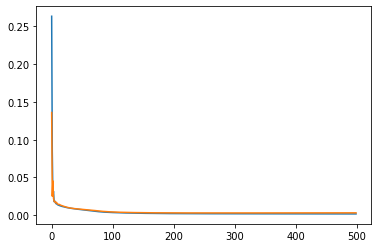

In [132]:
# 결과 plot
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

In [133]:
# 예측 테스트
predict = model.predict(X_test)

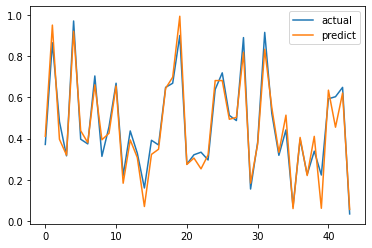

In [134]:
# Y_test와 겹쳐서 plot (겹치면 예측 성공)
plt.plot(Y_test, label = 'actual') # 실제 값
plt.plot(predict, label = 'predict') # 예측 값
plt.legend() # 범례
plt.show()